## Descripción del proyecto
Contexto
Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

#### Descripción de los datos
Datos utilizados en la primera parte del proyecto

/datasets/hypotheses_us.csv

- Hypotheses: breves descripciones de las hipótesis.
- Reach: alcance del usuario, en una escala del uno a diez.
- Impact: impacto en los usuarios, en una escala del uno al diez.
- Confidence: confianza en la hipótesis, en una escala del uno al diez.
- Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.


### Parte 1. Priorizar hipótesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda online con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

# Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.


In [2]:
# se importan las librerias necesarias para el analisis de datos
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt

# Se genera importa un modulo custom para usar una funcion para el analisis preliminar (looks)
import huki as hk

In [12]:
hypot = pd.read_csv('datasets/hypotheses_us.csv', sep=';')

In [11]:
hypot['ICE'] = (hypot['Impact'] * hypot['Confidence']) / hypot['Effort']
hypot['ICE'] = [round(a*10/max(hypot['ICE']), 2) for a in hypot['ICE']]
hypot['RICE'] = (hypot['Reach'] * hypot['Impact'] *
                hypot['Confidence']) / hypot['Effort']
hypot['RICE'] = [round(a*10/max(hypot['RICE']), 2) for a in hypot['RICE']]

hypot

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,8.23,3.57
1,Launch your own delivery service. This will sh...,2,5,4,10,1.23,0.36
2,Add product recommendation blocks to the store...,8,3,7,3,4.32,5.00
3,Change the category structure. This will incre...,8,3,3,8,0.69,0.80
4,Change the background color on the main page. ...,3,1,1,1,0.62,0.27
5,Add a customer review page. This will increase...,3,2,2,3,0.82,0.36
6,Show banners with current offers and sales on ...,5,3,8,3,4.94,3.57
7,Add a subscription form to all the main pages....,10,7,8,5,6.91,10.00
8,Launch a promotion that gives users discounts ...,1,9,9,5,10.00,1.45


#### Datos utilizados en la segunda parte del proyecto

/datasets/orders_us.csv

- transactionId: identificador de pedido.
- visitorId: identificador del usuario que realizó el pedido.
- date: fecha del pedido.
- revenue: ingresos del pedido.
- group: el grupo del test A/B al que pertenece el usuario.


/datasets/visits_us.csv

- date: la fecha.
- group: grupo de la prueba A/B.
 - visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.

Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

#### Parte 2. Análisis del test A/B
Realizaste una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv.

Ejercicio

Analiza el test A/B:

- Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
- Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
- Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
- Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
- Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
- Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
- Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
- Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
- Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 
    1. Parar la prueba, considerar a uno de los grupos como líder. 
    2. Parar la prueba, concluir que no hay diferencia entre los grupos. 
    3. Continuar la prueba.

In [16]:
orders = pd.read_csv("datasets/orders_us.csv")
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

hk.looks(orders)

Se ejecuta la descripción de los datos:
        transactionId     visitorId                           date  \
count    1.197000e+03  1.197000e+03                           1197   
unique            NaN           NaN                            NaN   
top               NaN           NaN                            NaN   
freq              NaN           NaN                            NaN   
mean     2.155621e+09  2.165960e+09  2019-08-15 13:06:46.015037696   
min      1.062393e+06  5.114589e+06            2019-08-01 00:00:00   
25%      1.166776e+09  1.111826e+09            2019-08-08 00:00:00   
50%      2.145194e+09  2.217985e+09            2019-08-15 00:00:00   
75%      3.237740e+09  3.177606e+09            2019-08-23 00:00:00   
max      4.293856e+09  4.283872e+09            2019-08-31 00:00:00   
std      1.229085e+09  1.236014e+09                            NaN   

             revenue group  
count    1197.000000  1197  
unique           NaN     2  
top              NaN     B  
fre

In [22]:
visits = pd.read_csv("datasets/visits_us.csv")
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

hk.looks(visits)

Se ejecuta la descripción de los datos:
                       date group      visits
count                    62    62   62.000000
unique                  NaN     2         NaN
top                     NaN     A         NaN
freq                    NaN    31         NaN
mean    2019-08-16 00:00:00   NaN  607.290323
min     2019-08-01 00:00:00   NaN  361.000000
25%     2019-08-08 06:00:00   NaN  534.000000
50%     2019-08-16 00:00:00   NaN  624.500000
75%     2019-08-23 18:00:00   NaN  710.500000
max     2019-08-31 00:00:00   NaN  770.000000
std                     NaN   NaN  114.400560

se hace exploración con método info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
m

In [18]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [24]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
    {'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique, 'visitorId': pd.Series.nunique, 'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])

In [25]:
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
    'date': 'max', 'group': 'max', 'visits': 'sum'}), axis=1).sort_values(by=['date', 'group'])

In [36]:
#  fusiona las dos tablas en una y da a sus columnas nombres descriptivos
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=[
                                        'date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group',
                        'orders', 'buyers', 'revenue', 'visitors']

cumulativeData['siz_ord'] = cumulativeData['revenue'] / \
    cumulativeData['orders']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors    siz_ord
0 2019-08-01     A      24      20   2356.8       719  98.200000
1 2019-08-01     B      21      20   1620.0       713  77.142857
2 2019-08-02     A      44      38   3860.3      1338  87.734091
3 2019-08-02     B      45      43   4243.8      1294  94.306667
4 2019-08-03     A      68      62   5675.5      1845  83.463235


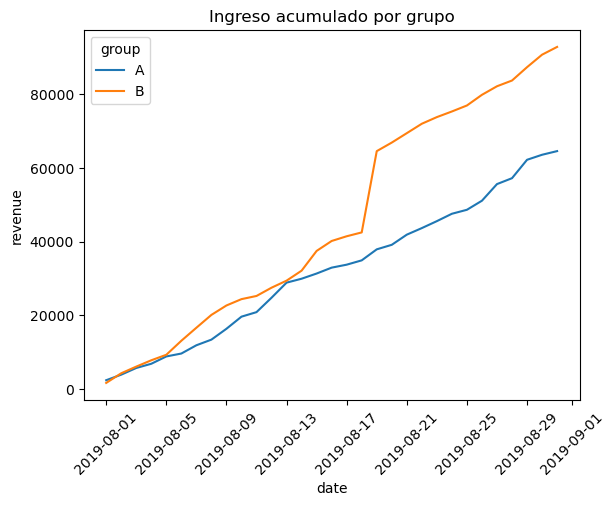

In [43]:
# Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
sns.lineplot(data=cumulativeData, x='date', y='revenue', hue='group')
plt.xticks(rotation=45)
plt.title('Ingreso acumulado por grupo')
plt.show()

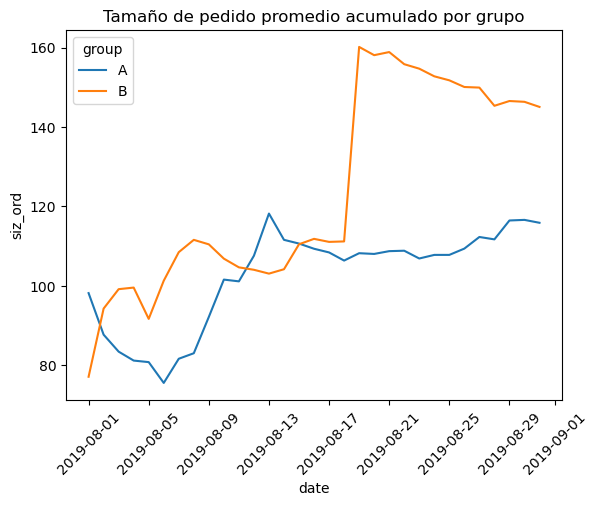

In [42]:
#  Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
sns.lineplot(data=cumulativeData, x='date', y='siz_ord', hue='group')
plt.xticks(rotation=45)
plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.show()

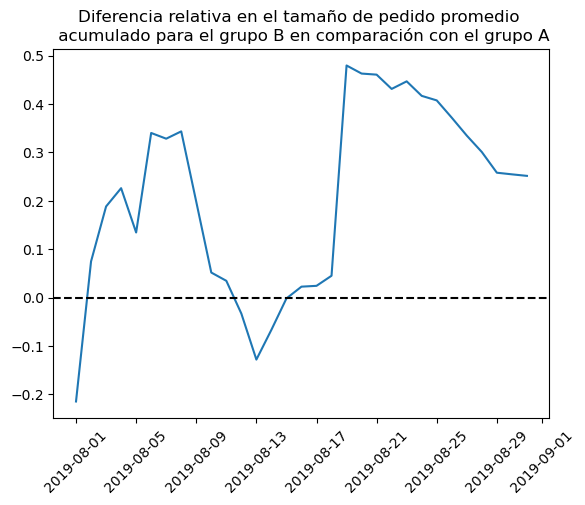

In [41]:
# Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeA = cumulativeData[cumulativeData['group'] == 'A']

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeB = cumulativeData[cumulativeData['group'] == 'B']


# reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeA.merge(
    cumulativeB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation=45)
plt.title('Diferencia relativa en el tamaño de pedido promedio \n acumulado para el grupo B en comparación con el grupo A')
plt.show()

In [ ]:

# Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
# Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
# Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

# Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
# Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
# Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

# Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
# Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
# Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.